<a href="https://colab.research.google.com/github/GladwinJosephSolomon/Score_Prediction/blob/main/Score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PREDICTION USING SUPERVISED MACHINE LEARNING**

In this task we will predict the percentage of marks that a student is expected to score based upon the number of hours he/she studies.

**Author: Gladwin Joseph Solomon B**

In [26]:
#1 Import all necessary libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [27]:
#2 Read data from the URL
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


**Now let's get some more information about the dataset by using the 'describe()' and 'info()' functions**

In [28]:
#3 Get additional info about the dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [29]:
#4 Get additional info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Plotting the data in a chart**

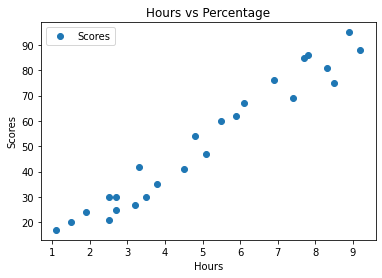

In [30]:
#5 Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours')  
plt.ylabel('Scores')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

**Preparing the data**

Now we divide the data into inputs and outputs to train the model.

In [31]:
#6 Separating data into input and output
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

**Next we split this data into training and test sets.**

In [40]:
#7 Separating data into training and test sets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.5, random_state=0) 

**Training the Algorithm**

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [41]:
#8 Training the algorithm to fit the dataset
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


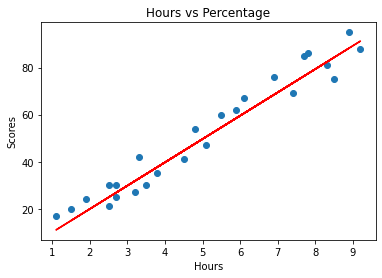

In [42]:
#9 Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.title('Hours vs Percentage')
plt.xlabel('Hours')  
plt.ylabel('Scores') 
plt.scatter(X, y)
plt.plot(X, line,color='red');
plt.show()

**Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.**

In [43]:
#10 make predictions
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]]


In [44]:
#11 Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,14.973540
1,27,31.811747
2,69,73.412023
3,30,24.878368
4,62,58.554782
5,35,37.754644
6,24,18.935471
7,86,77.373954
8,76,68.459609
9,17,11.011609


In [45]:
#12 We can also test with our own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("Predicted Score of a student if he/she studies for {} hours is {}".format(hours,own_pred[0]))

Predicted Score of a student if he/she studies for 9.25 hours is 91.73595402298852


**From the above output, we can see that the predicted score of a student who studies for 9.25Hrs is 91.73%**

Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [39]:
#13 Evaluating the model
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Maximum Error:', metrics.max_error(y_test, y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
Maximum Error: 6.732260779489835
Mean Squared Error: 21.598769307217456
